# Modelo de machine learning para predecir cantidad de personal necesario (Regresion Lineal)
Para este problema se propone un modelo de machine learning que predice la cantidad de personal necesaria en una empresa de servicios de Farmacias. El modelo se basa en un dataset que contiene información sobre la cantidad de transacciones realizadas en la farmacia, la cantidad de personal que trabajó en la farmacia y la cantidad de personal que se necesitó para atender a los clientes.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar el archivo CSV con las columnas relevantes
df = pd.read_csv('personal_necesario.csv')

In [17]:
# columnas 
df.head()

,Suc_Id,Dia_Semana,Hora,Factura_Fecha,Cantidad_Transacciones,Cajas_Activas,Personal_Necesario
0,1,1,7,2024-10-21,5,2,1.0
1,1,1,7,2024-10-28,3,2,1.0
2,1,1,8,2024-10-07,2,2,1.0
3,1,1,8,2024-10-14,1,2,1.0
4,1,1,8,2024-10-21,1,2,1.0


In [18]:
df.describe()

,Suc_Id,Dia_Semana,Hora,Cantidad_Transacciones,Cajas_Activas,Personal_Necesario
count,118249.000000,118249.000000,118249.000000,118249.000000,118249.000000,118249.000000
mean,154.607295,3.834392,13.900033,7.293017,3.079569,1.386202
std,93.784443,1.952358,4.218931,6.146868,0.945796,0.700504
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,73.000000,2.000000,10.000000,3.000000,3.000000,1.000000
50%,149.000000,4.000000,14.000000,6.000000,3.000000,1.000000
75%,241.000000,6.000000,17.000000,9.000000,3.000000,2.000000
max,328.000000,7.000000,23.000000,79.000000,7.000000,10.000000


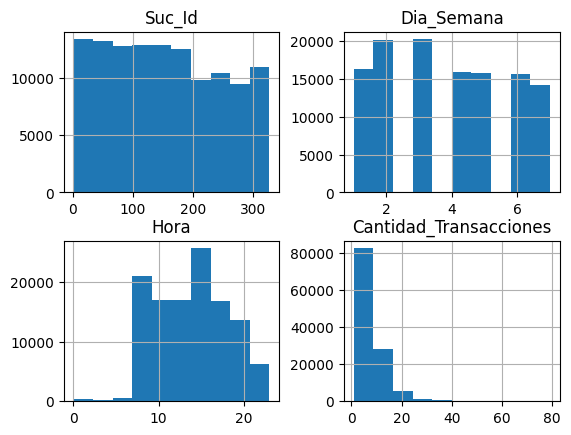

In [19]:
graph = df[['Suc_Id','Dia_Semana','Hora','Cantidad_Transacciones']]
graph.head(10)
graph.hist()
plt.show()

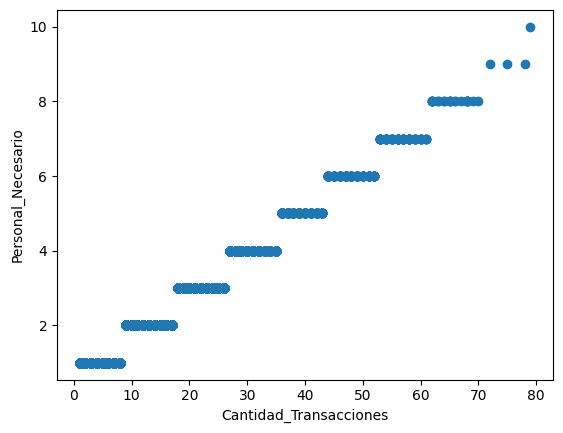

In [20]:
# cual de las caracteristicas es lineales segun cantidad de personal necesario Cantidad_Transacciones frente a Personal_Necesario
plt.scatter(df['Cantidad_Transacciones'], df['Personal_Necesario'])
plt.xlabel('Cantidad_Transacciones')
plt.ylabel('Personal_Necesario')
plt.show()


In [8]:
# Seleccionar las características relevantes
features = ['Suc_Id', 'Dia_Semana', 'Hora', 'Cantidad_Transacciones', 'Personal_Necesario']
df = df[features]

In [9]:
X = df[['Suc_Id', 'Dia_Semana', 'Hora', 'Cantidad_Transacciones']]
y = df['Personal_Necesario']
# cantidad de datos
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(118249, 4)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Mostrar las primeras filas del DataFrame con las predicciones
df_result = X_test.copy()
df_result['Personal_Necesario_Real'] = y_test
df_result['Personal_Necesario_Predicho'] = y_pred
print(df_result.head())

Error cuadrático medio (MSE): 0.06686703971800134
       Suc_Id  Dia_Semana  Hora  Cantidad_Transacciones  \
72625     183           5    11                       8   
7623       20           5     8                       4   
96942     260           5    16                      13   
64150     162           3    11                       6   
64090     162           2    11                       4   

       Personal_Necesario_Real  Personal_Necesario_Predicho  
72625                      1.0                     1.472397  
7623                       1.0                     1.046463  
96942                      2.0                     1.994424  
64150                      1.0                     1.256192  
64090                      1.0                     1.042340  


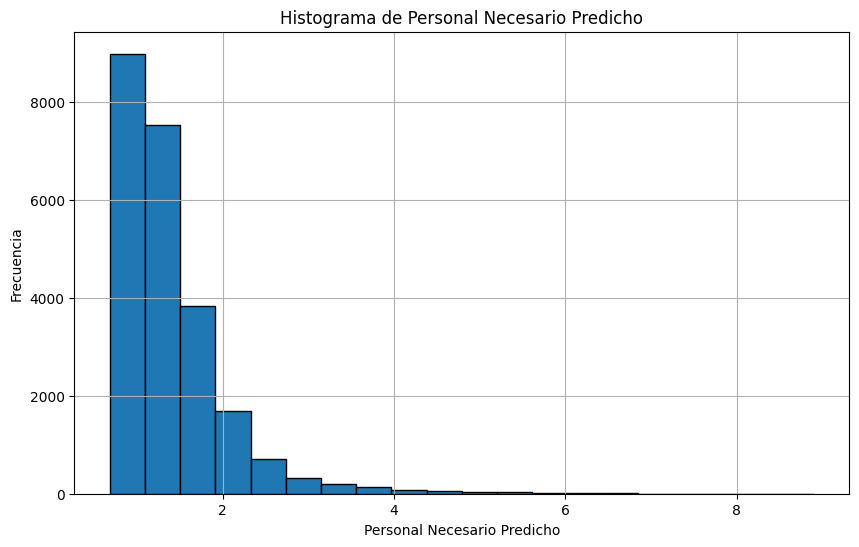

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_result['Personal_Necesario_Predicho'], bins=20, edgecolor='black')
plt.title('Histograma de Personal Necesario Predicho')
plt.xlabel('Personal Necesario Predicho')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [15]:
turnos = {
    'Turno_1': list(range(7, 15)),  # 7 AM a 3 PM
    'Turno_2': list(range(15, 23)),  # 3 PM a 11 PM
    'Turno_3': list(range(23, 24)) + list(range(0, 7))  # 11 PM a 7 AM
}

# Función para predecir la cantidad de personal necesario dado un conjunto de transacciones esperadas
def predecir_personal(suc_id, dia_semana, hora, transacciones_esperadas):
    datos = pd.DataFrame({
        'Suc_Id': [suc_id],
        'Dia_Semana': [dia_semana],
        'Hora': [hora],
        'Cantidad_Transacciones': [transacciones_esperadas]
    })
    prediccion = model.predict(datos)
    # redondear hacia abajo si es menor a .5 y hacia arriba si es mayor o igual a .5
    return int(np.round(prediccion[0]))

# Función para predecir el personal necesario por turno
def predecir_personal_turno(suc_id, dia_semana, transacciones_por_hora):
    personal_por_turno = {}
    for turno, horas in turnos.items():
        total_personal = 0
        for hora in horas:
            transacciones_esperadas = transacciones_por_hora.get(hora, 0)
            personal_necesario = predecir_personal(suc_id, dia_semana, hora, transacciones_esperadas)
            total_personal = max(total_personal, personal_necesario)
        personal_por_turno[turno] = total_personal
    return personal_por_turno

# Ejemplo de uso de la función de predicción por turno
suc_id = 3
dia_semana = 1  # Martes
transacciones_por_hora = {0: 14, 1: 4, 2: 1, 3: 3, 4: 3, 5: 3, 6: 4, 7: 13, 8: 6, 9: 10, 10: 6, 11: 25, 12: 19, 13: 14, 14: 10, 15: 8, 16: 4, 17: 8, 18: 11, 19: 18, 20: 3, 21: 12, 22: 8, 23: 7}

personal_necesario_turno = predecir_personal_turno(suc_id, dia_semana, transacciones_por_hora)
print(f'Personal necesario para la sucursal {suc_id} el día {dia_semana} por turno: {personal_necesario_turno}')

Personal necesario para la sucursal 3 el día 1 por turno: {'Turno_1': 3, 'Turno_2': 2, 'Turno_3': 2}


In [2]:
import joblib

In [ ]:
# guardar el modelo

joblib.dump(model, 'modelo_personal_necesario.pkl')


['modelo_personal_necesario.pkl']

In [3]:
# cagar modelo entrenado
model = joblib.load('modelo_personal_necesario.pkl')